# Tests on PandaPower

## Importation prod éolienne

In [102]:
import pandas as pd
import pandapower as pp
import numpy as np
from pandapower.networks import mv_oberrhein
import pandapower.plotting as plot
from pandapower.plotting.plotly import simple_plotly
import re
from decimal import Decimal
from pandapower.networks import mv_oberrhein

In [100]:
test = pd.read_csv('../data_extraction/wind/outputs/database_FR.csv', sep = ';', encoding = "ISO-8859-1")

In [3]:
test

,Wind farm name,Total nominal power,Latitude,Longitude
0,4 vents,"7,500 kW","48å¡ 28' 20.6""","4å¡ 9' 51.9"""
1,Ablaincourt-Pressoir,"4,100 kW","49å¡ 50' 10.9""","2å¡ 47' 42.2"""
2,Ablainzevelle,"2,000 kW","50å¡ 9' 10""","2å¡ 43' 55.9"""
3,Achery-Mayot,"27,500 kW","49å¡ 41' 49.2""","3å¡ 24' 25"""
4,Adriers,"10,000 kW","46å¡ 15' 37.5""","0å¡ 44' 48.6"""
5,Agenville,"6,000 kW","50å¡ 10' 54.9""","2å¡ 6' 35.7"""
6,Ailes de la Vence,"2,400 kW","49å¡ 35' 1.6""","4å¡ 39' 44.5"""
7,Aire de Baie de Somme,250 kW,"50å¡ 10' 12""","1å¡ 45' 0"""
8,Alizeo,"1,000 kW","42å¡ 47' 53.4""","2å¡ 53' 21.4"""
9,Allanche,"12,000 kW","45å¡ 14' 14.5""","2å¡ 59' 18.4"""


In [4]:
test['Latitude'] = test['Latitude'].str.replace('å¡','°')
test['Longitude'] = test['Longitude'].str.replace('å¡','°')
test

,Wind farm name,Total nominal power,Latitude,Longitude
0,4 vents,"7,500 kW","48° 28' 20.6""","4° 9' 51.9"""
1,Ablaincourt-Pressoir,"4,100 kW","49° 50' 10.9""","2° 47' 42.2"""
2,Ablainzevelle,"2,000 kW","50° 9' 10""","2° 43' 55.9"""
3,Achery-Mayot,"27,500 kW","49° 41' 49.2""","3° 24' 25"""
4,Adriers,"10,000 kW","46° 15' 37.5""","0° 44' 48.6"""
5,Agenville,"6,000 kW","50° 10' 54.9""","2° 6' 35.7"""
6,Ailes de la Vence,"2,400 kW","49° 35' 1.6""","4° 39' 44.5"""
7,Aire de Baie de Somme,250 kW,"50° 10' 12""","1° 45' 0"""
8,Alizeo,"1,000 kW","42° 47' 53.4""","2° 53' 21.4"""
9,Allanche,"12,000 kW","45° 14' 14.5""","2° 59' 18.4"""


In [5]:
def formatlist(degrees):
    degrees = re.split('°|\' ',degrees)
    degrees[-1] = degrees[-1].replace('"',"")
    degrees = [float(x) for x in degrees]
    return degrees

def decimalDegree(degrees):
    degree, minute, second = degrees[0], degrees[1], degrees[2]
    return degree + (minute + second/60.)/60.

In [6]:
test['Latitude'] = test['Latitude'].astype(str)
test['Longitude'] = test['Longitude'].astype(str)
test['Longitude'] = test['Longitude'].apply(lambda row: formatlist(row))
test['Latitude'] = test['Latitude'].apply(lambda row: formatlist(row))
test['longlat'] = test['Latitude'].apply (lambda row: len(row))
test['longlong'] = test['Longitude'].apply (lambda row: len(row))
test = test.loc[test['longlat'] == 3]

In [7]:
test['Longitude'] = test['Longitude'].apply(lambda row: decimalDegree(row))
test['Latitude'] = test['Latitude'].apply(lambda row: decimalDegree(row))

## Test Visualisation

In [8]:
network = pp.create_empty_network()

In [9]:
coord1 = (50.050371, 2.978700)[::-1]
coord2 = (49.838145, 2.825777)[::-1]
coord3 = (48.868504, 2.441685)[::-1]
coord4 = (49.218184, 4.078610)[::-1]
coord5 = (42.522918, 3.036108)[::-1]
coord6 = (45.912394, 6.869214)[::-1]
coord7 = (43.693737, 7.246635)[::-1]
coord8 = (43.407901, -1.515821)[::-1]

In [10]:
bus1 = pp.create_bus(network, name=test["Wind farm name"][0], vn_kv=110, type="b", geodata = coord1)
bus2 = pp.create_bus(network, name=test["Wind farm name"][1], vn_kv=110, type="b", geodata = coord2)
bus3 = pp.create_bus(network, name='Paname', vn_kv=110, type="b", geodata = coord3)
bus4 = pp.create_bus(network, name='Reims', vn_kv=110, type="b", geodata = coord4)
bus5 = pp.create_bus(network, name='Perpi', vn_kv=110, type="b", geodata = coord5)
bus6 = pp.create_bus(network, name='Cham', vn_kv=110, type="b", geodata = coord6)
bus7 = pp.create_bus(network, name='Nice', vn_kv=110, type="b", geodata = coord7)
bus8 = pp.create_bus(network, name='Biarritz', vn_kv=110, type="b", geodata = coord8)
network.bus

,name,vn_kv,type,zone,in_service
0,4 vents,110.0,b,None,True
1,Ablaincourt-Pressoir,110.0,b,None,True
2,Paname,110.0,b,None,True
3,Reims,110.0,b,None,True
4,Perpi,110.0,b,None,True
5,Cham,110.0,b,None,True
6,Nice,110.0,b,None,True
7,Biarritz,110.0,b,None,True


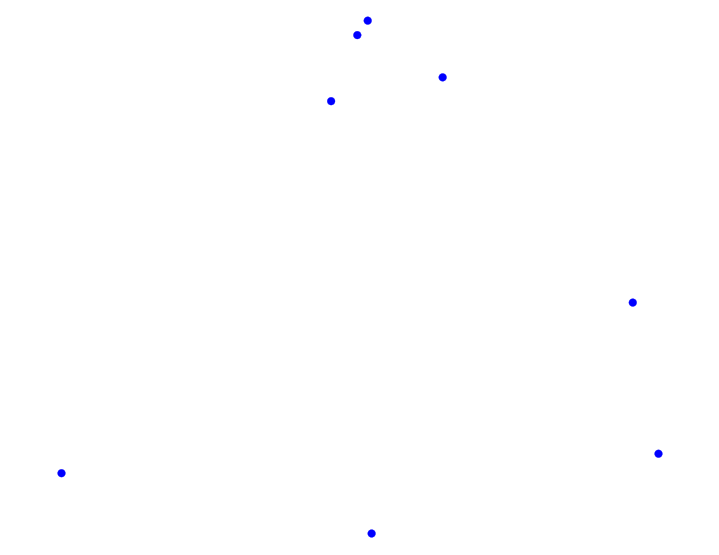

In [11]:
plot.simple_plot(network, bus_size=0.7)

## Importation multiple des parcs

In [12]:
test['Total nominal power'] = test['Total nominal power'].astype(str).str.extract('(\d+)').astype(float)
test.loc[test['Total nominal power'] >= 10]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,Wind farm name,Total nominal power,Latitude,Longitude,longlat,longlong
3,Achery-Mayot,27.0,49.697000,3.406944,3,3
4,Adriers,10.0,46.260417,0.746833,3,3
7,Aire de Baie de Somme,250.0,50.170000,1.750000,3,3
9,Allanche,12.0,45.237361,2.988444,3,3
11,Allondrelle-la-Malmaison,10.0,49.512556,5.547528,3,3
12,Ally,10.0,45.149972,3.290000,3,3
13,Ambon,10.0,47.580611,-1.460361,3,3
14,AmÌ©lÌ©court,12.0,48.846056,6.473000,3,3
15,Anguilcourt-le-Sart,12.0,49.703889,3.422194,3,3
16,Anoux-Saint-Saumont,10.0,49.269750,5.889417,3,3


In [79]:
frenchwindfarmsnames = test['Wind farm name'].tolist()

In [80]:
frenchfarms = {}
for x in frenchwindfarmsnames:
    line_to_enter = test.loc[test['Wind farm name'] == x]
    frenchfarms[x] = [line_to_enter['Total nominal power'].item(), line_to_enter['Longitude'].item(), line_to_enter['Latitude'].item()]

In [89]:
french_network = pp.create_empty_network()
for x in frenchfarms.keys():
    pp.create_bus(french_network, name=x, vn_kv=110, type="b", geodata = (frenchfarms[x][2], (frenchfarms[x][1])))

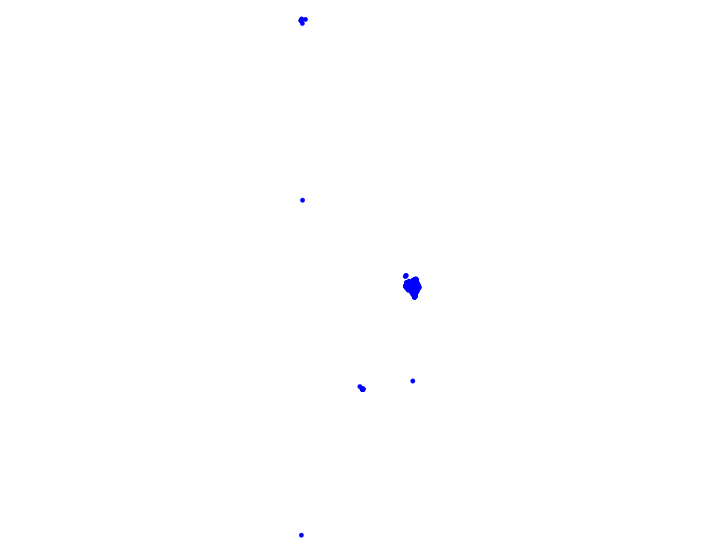

In [98]:
plot.simple_plot(french_network, bus_size=0.7)